In [17]:
import numpy as np
import pandas as pd 
import scipy 
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score 
import warnings 
warnings.filterwarnings('ignore')

In [18]:
#Data Loading

ds=pd.read_csv('hr_attrition.csv')
ds

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [19]:
ds.drop_duplicates()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


This indicates that there are no duplicates in the dataset

In [20]:
df=pd.DataFrame(data=ds,columns=ds.columns)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [21]:
df.shape

(1470, 35)

In [22]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [23]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

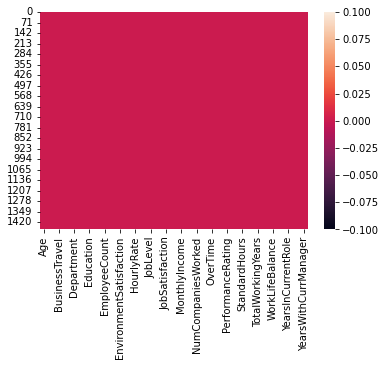

In [24]:
sns.heatmap(df.isnull())

This data has no null values

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [26]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [27]:
# Converting String Values to Interger Values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
list=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18',
      'OverTime',]
for i in list:
    df[i]=le.fit_transform(df[i].astype(str))
    
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [29]:
#Checking Correlation

In [30]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


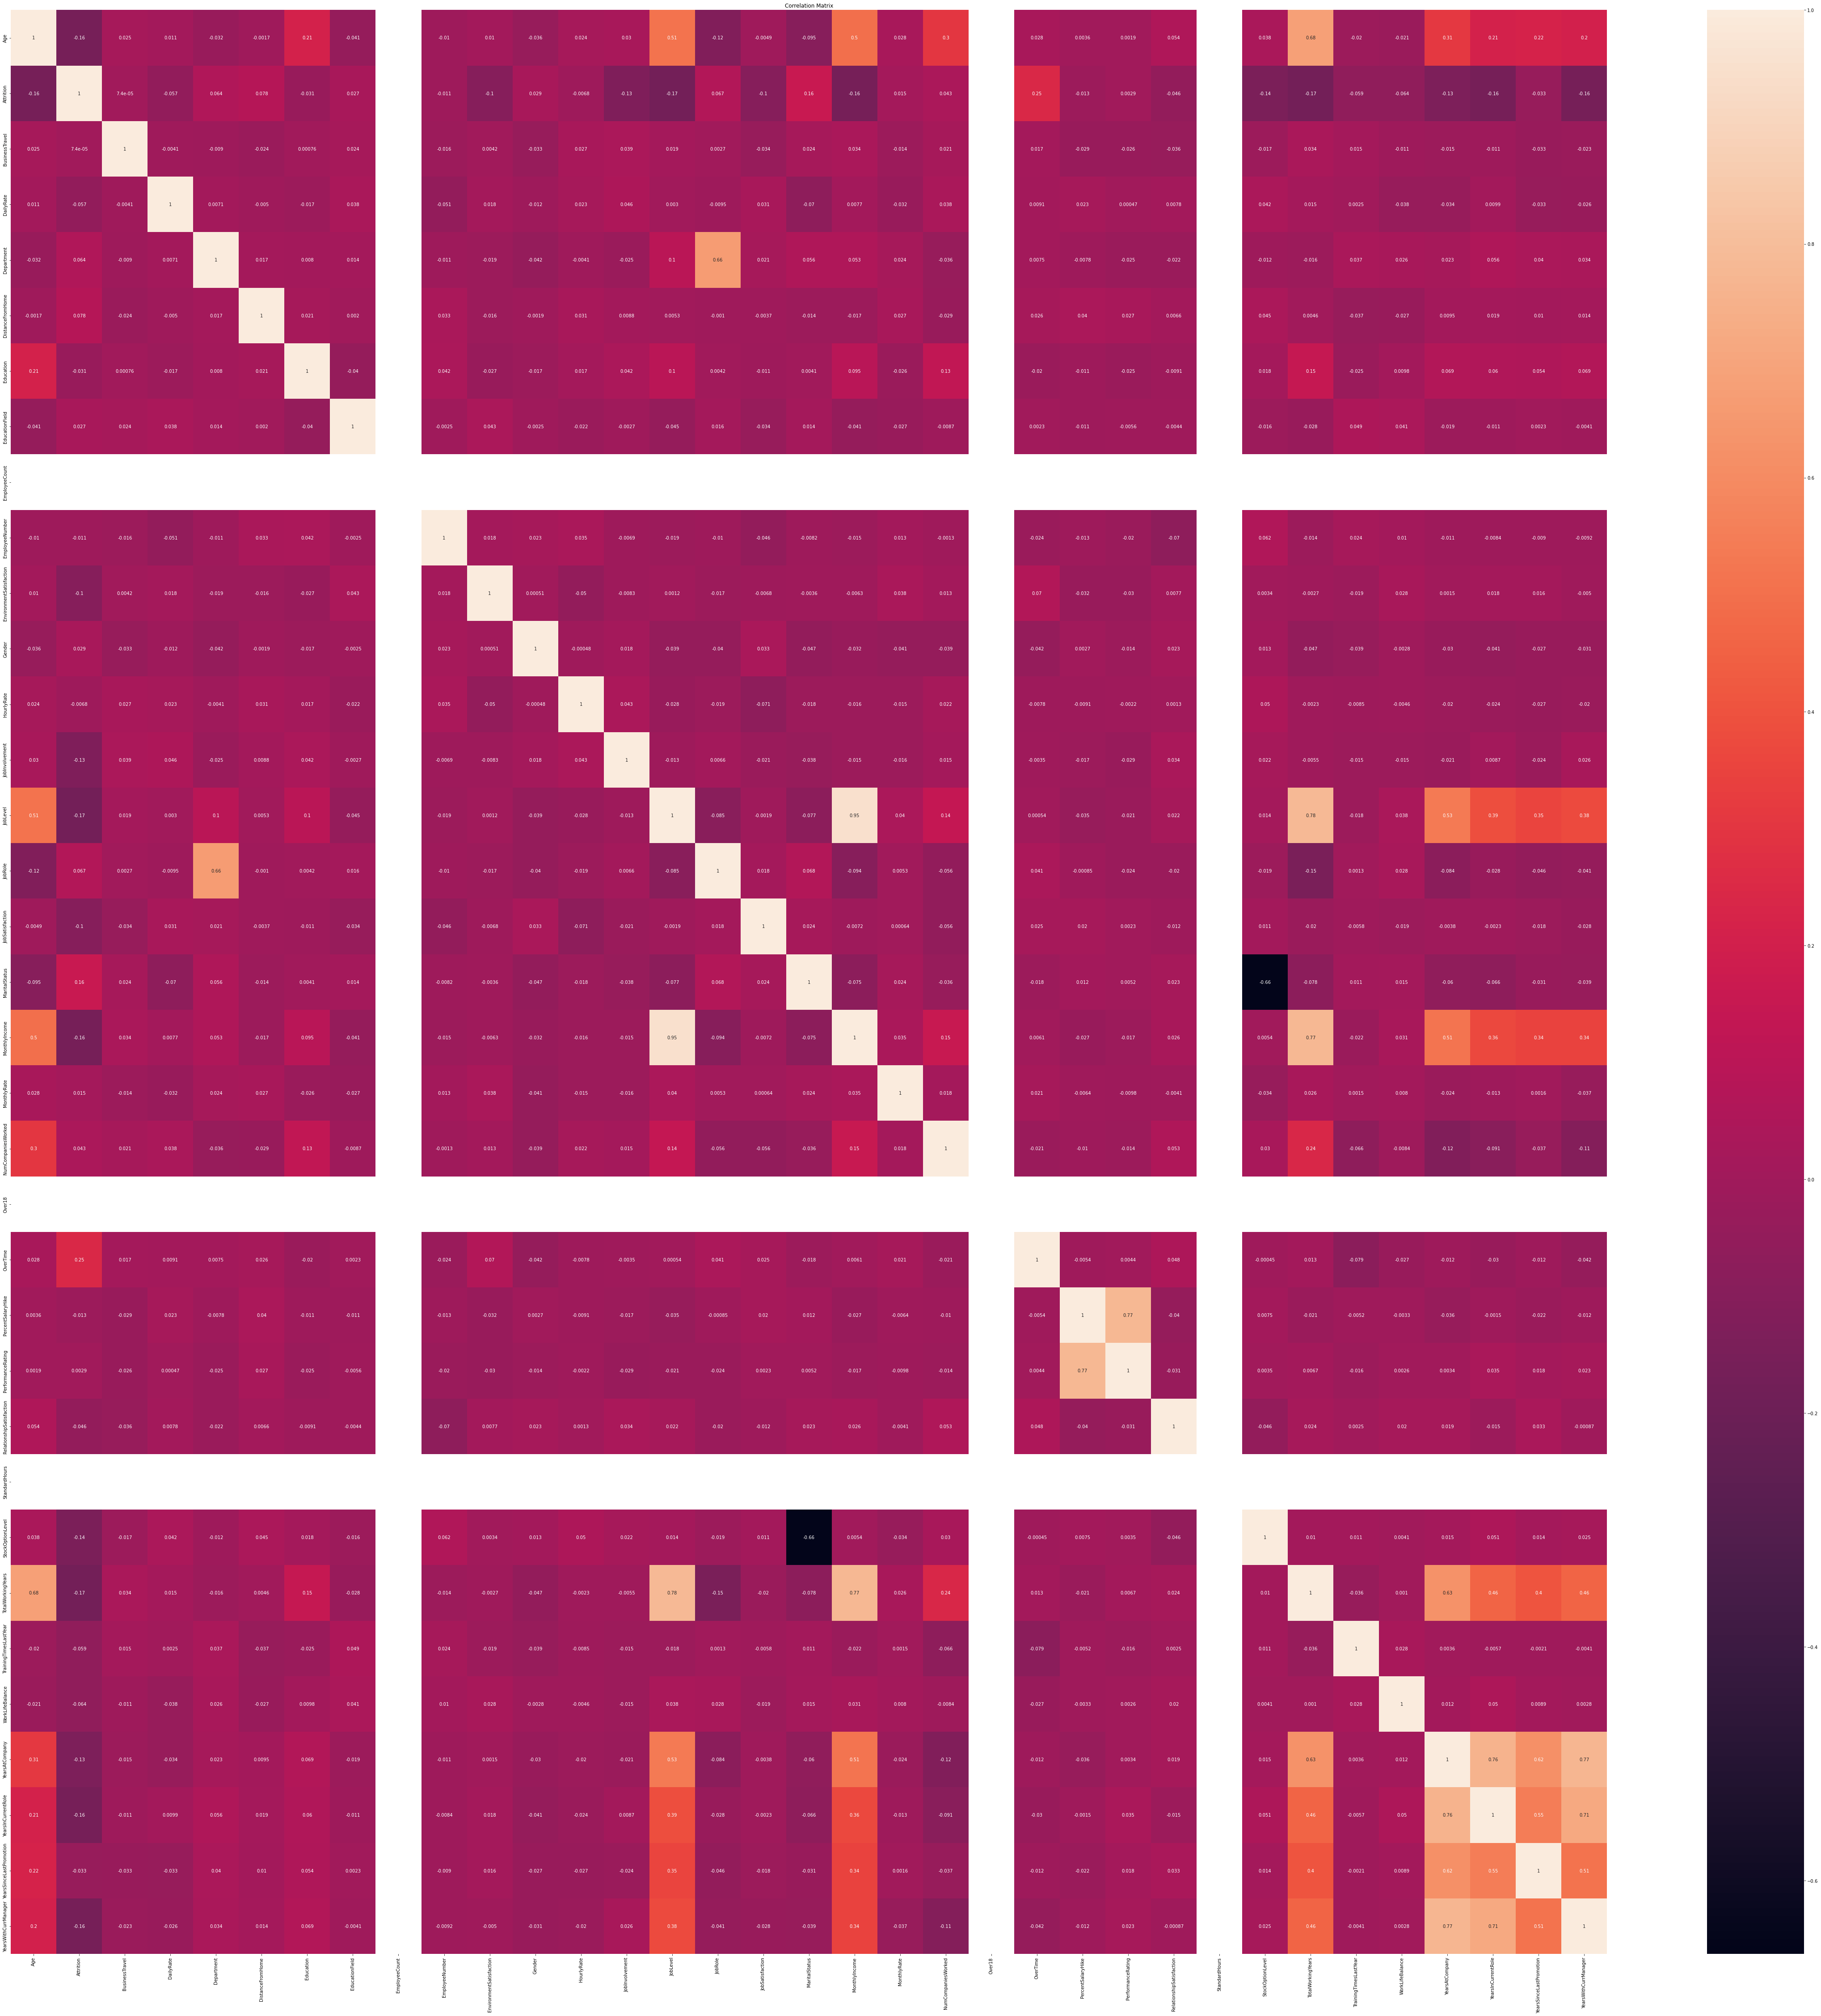

In [31]:
plt.figure(figsize=[80,80])
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix.jpg')
plt.show()

Observation: we are unable to identify the correlation in the above heatmap due to huge number of columns. Printing correlation values of independent variables in sorted form

In [32]:
df.corr()['Attrition'].sort_values(ascending=True)

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
J

There are more columns who are negatively correlated to the outcome variables than there are in those who correlates positively.
Three variables have no correaltions at all hence the need to drop them.

In [33]:
df.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

In [34]:
#Distribution among columns

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

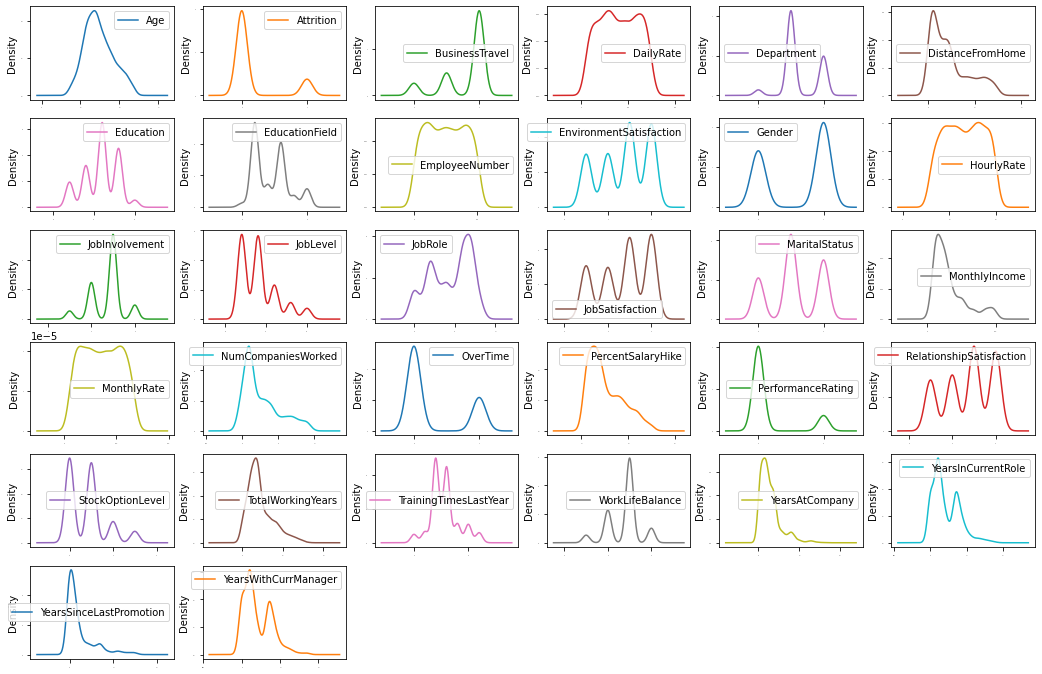

In [35]:
df.plot(kind='density',subplots=True,layout=(6,6),sharex=False,fontsize=1,figsize=(18,12))

The above indicates thst the date is highly skewed hence the need to remove the skewness

In [36]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [37]:
#checking skewness

In [38]:
x.skew().sort_values(ascending=False)

YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
YearsAtCompany              1.764529
MonthlyIncome               1.369817
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
OverTime                    0.964489
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
EducationField              0.550371
Age                         0.413286
Department                  0.172231
MonthlyRate                 0.018578
EmployeeNumber              0.016574
DailyRate                  -0.003519
HourlyRate                 -0.032311
MaritalStatus              -0.152175
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
JobRole                    -0.357270
G

The presence of skewness needs to be removed in the data

In [39]:
from sklearn.preprocessing import power_transform,PowerTransformer

In [40]:
pt=PowerTransformer()
x_new=pt.fit_transform(x)
x_new

array([[ 0.52213976,  0.63546836,  0.7592893 , ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.27641097, -1.39286498, -1.33459724, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.10209148,  0.63546836,  1.34036452, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.12375507,  0.63546836, -1.75171312, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.27641097, -1.39286498,  0.58323545, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.23618832,  0.63546836, -0.35884464, ..., -0.08961473,
         0.09685415, -0.40688122]])

In [41]:
#rechecking skewness
pd.DataFrame(x_new,columns=x.columns).skew().sort_values(ascending=False)

OverTime                    0.964489
YearsSinceLastPromotion     0.212129
PercentSalaryHike           0.116250
JobLevel                    0.103624
StockOptionLevel            0.087019
TrainingTimesLastYear       0.058058
MonthlyIncome               0.032831
NumCompaniesWorked          0.014814
Department                  0.013801
PerformanceRating           0.000000
DistanceFromHome           -0.007468
Age                        -0.007603
EducationField             -0.008386
YearsAtCompany             -0.008683
TotalWorkingYears          -0.010653
WorkLifeBalance            -0.012286
JobInvolvement             -0.020365
YearsInCurrentRole         -0.060849
YearsWithCurrManager       -0.067565
Education                  -0.099881
HourlyRate                 -0.106461
MaritalStatus              -0.156911
MonthlyRate                -0.184087
RelationshipSatisfaction   -0.193634
DailyRate                  -0.196160
EnvironmentSatisfaction    -0.205395
JobSatisfaction            -0.212815
E

Skewness has been removed from the data

In [42]:
x=pd.DataFrame(x_new,columns=x.columns)

In [43]:
#Checking Outliers

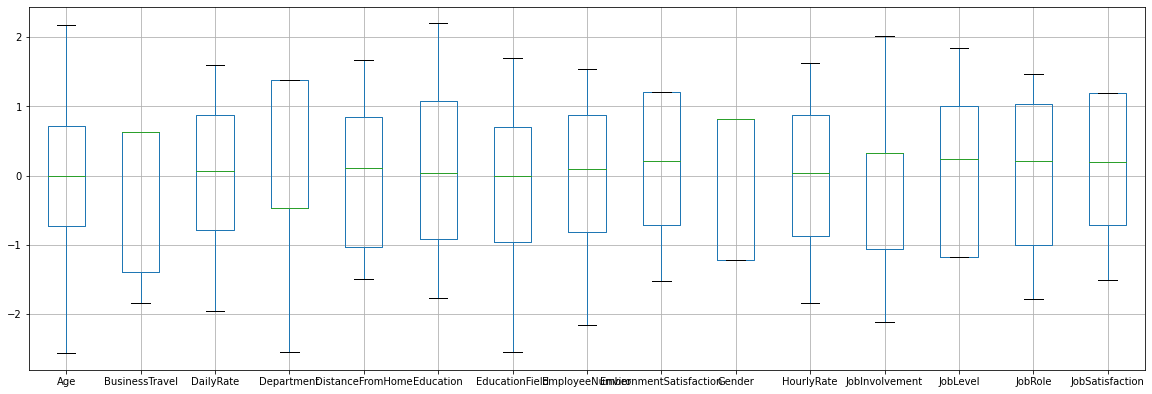

In [44]:
x.iloc[:,0:15].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

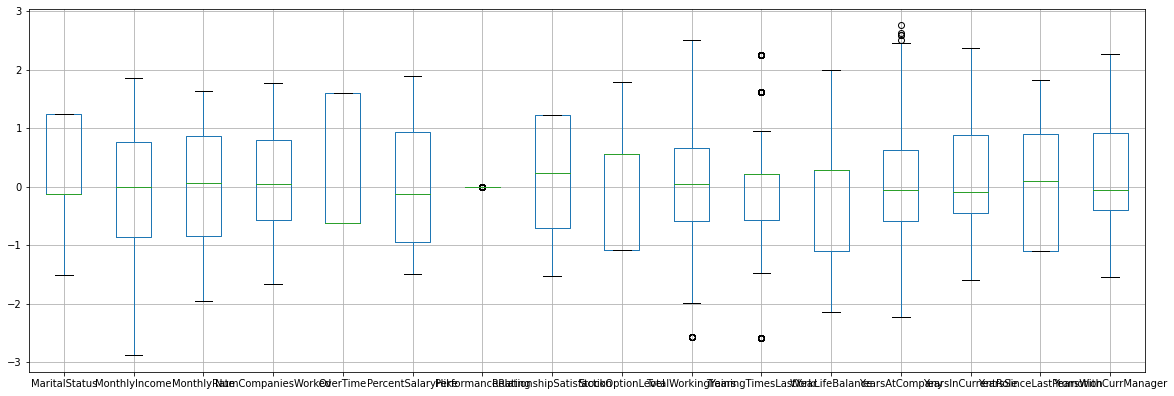

In [45]:
x.iloc[:,15:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Few outliers has been identified

In [46]:
#quantifying outliers

In [47]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all().all()

True

This indicates that there is no significant outliers in the data

In [48]:
#Training the data set

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [50]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    mae=mean_absolute_error(y_test,predlr)
    print('Error ', mae, 'Random_State ', i )

Error  0.2509307572528604 Random_State  1
Error  0.24342186331770135 Random_State  2
Error  0.24567727316637036 Random_State  3
Error  0.23931176554630842 Random_State  4
Error  0.24393429487664217 Random_State  5
Error  0.24028584558614693 Random_State  6
Error  0.2545638942092321 Random_State  7
Error  0.24177346116815043 Random_State  8
Error  0.23666834488405453 Random_State  9
Error  0.24863389872478847 Random_State  10
Error  0.2415867879789218 Random_State  11
Error  0.23968894951613162 Random_State  12
Error  0.2465358901235446 Random_State  13
Error  0.2367908988644854 Random_State  14
Error  0.25257096243287586 Random_State  15
Error  0.24269745862991982 Random_State  16
Error  0.25012118341978223 Random_State  17
Error  0.2423243140925955 Random_State  18
Error  0.2666095130543426 Random_State  19
Error  0.2475121679232378 Random_State  20
Error  0.24943481400232173 Random_State  21
Error  0.25561077768732765 Random_State  22
Error  0.25141240956034416 Random_State  23
Error

The best random state value with minimum error is 26 per the above

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [52]:
x_train.shape

(1029, 31)

In [53]:
x_test.shape

(441, 31)

In [54]:
y_train.shape

(1029,)

In [55]:
y_test.shape

(441,)

In [56]:
lr.coef_

array([-2.56967964e-02, -1.44908528e-02, -8.33425486e-03,  2.45377265e-02,
        2.23471438e-02,  2.50246012e-03,  3.86189418e-03, -2.18627119e-03,
       -5.26009427e-02,  1.96157668e-02, -2.35761239e-03, -4.83712818e-02,
       -4.08208881e-03, -4.71675545e-03, -3.69352481e-02,  3.14398594e-02,
       -3.68136755e-02,  1.25735203e-02,  3.66547342e-02,  9.61719491e-02,
       -1.57061544e-02,  6.97629442e-16, -2.35526927e-02, -3.27256810e-02,
       -4.21895437e-02, -1.96863128e-02, -1.34404911e-02,  3.44390518e-02,
       -3.50124971e-02,  3.74439031e-02, -4.06806649e-02])

In [57]:
lr.intercept_

0.16109444356456637

In [58]:
lr.score(x_train,y_train)

0.2471538431740975

In [59]:
#predict the value
predlr=lr.predict(x_test)
print('predict years with current manager:',predlr)
print('actual years with current manager:',y_test)

predict years with current manager: [ 8.48863124e-02 -1.06844389e-01  3.19611754e-01 -1.31865527e-03
  2.57635201e-02  1.55661716e-01  2.75331816e-01  3.63967740e-02
  1.24175006e-01 -1.37078779e-02  3.69457007e-01 -3.07623760e-02
  1.88115114e-01  1.03579149e-01  9.21471245e-02  3.60414848e-02
  1.97862428e-01  6.29243318e-02  3.63994901e-01  7.54757064e-02
  3.30851878e-01 -9.27998957e-02  1.11575043e-02  3.33959019e-01
  2.16069591e-01 -8.59650576e-02  2.68878346e-01 -2.42590700e-02
  1.79804602e-01  1.39289129e-01  2.71091924e-02 -7.65033155e-02
 -1.17024710e-01  2.35895032e-02  4.15591012e-01 -1.49889060e-01
 -2.01706227e-02  4.60657368e-01  4.80830184e-01  7.06603868e-02
  1.03150182e-01  2.46971909e-01  1.60477359e-01  1.49320592e-01
  4.67325159e-01  8.25587418e-02  5.23353776e-01  3.70711975e-01
  3.41085032e-01  7.00301520e-01  4.58829716e-02  1.60033026e-01
  2.50447282e-02  1.45248425e-01  1.15840238e-01  1.48739516e-01
  3.04476789e-01 -1.32691057e-01  2.23517285e-01  1.58

In [60]:
print('error:')
print('Mean absolute error:', mean_absolute_error(y_test,predlr))
print('Mean squared error:', mean_squared_error(y_test,predlr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predlr)))

error:
Mean absolute error: 0.22808308071163394
Mean squared error: 0.1001045551249302
Root mean squared error: 0.31639303899569315


In [61]:
#predict the value
predlr=lr.predict(x_test)
print('predicted years of stay:',predlr)
print('actual years of stay:',y_test)

predicted years of stay: [ 8.48863124e-02 -1.06844389e-01  3.19611754e-01 -1.31865527e-03
  2.57635201e-02  1.55661716e-01  2.75331816e-01  3.63967740e-02
  1.24175006e-01 -1.37078779e-02  3.69457007e-01 -3.07623760e-02
  1.88115114e-01  1.03579149e-01  9.21471245e-02  3.60414848e-02
  1.97862428e-01  6.29243318e-02  3.63994901e-01  7.54757064e-02
  3.30851878e-01 -9.27998957e-02  1.11575043e-02  3.33959019e-01
  2.16069591e-01 -8.59650576e-02  2.68878346e-01 -2.42590700e-02
  1.79804602e-01  1.39289129e-01  2.71091924e-02 -7.65033155e-02
 -1.17024710e-01  2.35895032e-02  4.15591012e-01 -1.49889060e-01
 -2.01706227e-02  4.60657368e-01  4.80830184e-01  7.06603868e-02
  1.03150182e-01  2.46971909e-01  1.60477359e-01  1.49320592e-01
  4.67325159e-01  8.25587418e-02  5.23353776e-01  3.70711975e-01
  3.41085032e-01  7.00301520e-01  4.58829716e-02  1.60033026e-01
  2.50447282e-02  1.45248425e-01  1.15840238e-01  1.48739516e-01
  3.04476789e-01 -1.32691057e-01  2.23517285e-01  1.58698722e-01


In [62]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predlr))

0.1601193276422972


In [63]:
#saving the best model

In [64]:
df=pd.DataFrame(predlr)
df.to_csv('HR_Attrition assignment.csv')
